# WeRateDogs Data Wrangling Project
#### By: Connor Zarkowski

This project uses tweets from the popular twitter handle, @dog_rates. They are well-known for their generous rating scale, almost always giving dogs a rating of greater than 100%. In order to gain valid insights from any dataset, the data must be as clean as possible. This notebook is structured into gathering, assessing, and cleaning steps to wrangle the data, then the data is used to provide insights through visualizations and statistics. 

# Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Twitter Archive

In [2]:
#Reading the provided csv to a dataframe.
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#Checking to see if it loaded correctly/getting an impression of what the data looks like.
df_archive.info()
df_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Gathering Image Predictions from Udacity Server

In [21]:
#Pulling image predictions tsv from Udacity's server.
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

In [1]:
#Verifying file was pulled
#r.content

In [38]:
#Preparing tsv file to be read to a dataframe.
import csv

with open('image_predictions.tsv', 'w') as f:
    writer = csv.writer(f)
    reader = csv.reader(r.text.splitlines())

    for row in reader:
        writer.writerow(row)

In [6]:
df_images = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
df_images.info()
df_images.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Gathering Retweet and Favorite Count from Twitter API

In [83]:
#Querying Twitter's API for additional data.
import tweepy

#Consumer/Access key & token removed

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [84]:
#Saving queried data to a list, also saving errors to try querying them again.
queried = []
error_list = []
for tweet_id in df['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        
        queried.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

888202515573088257 _ [{u'message': u'No status found with that ID.', u'code': 144}]
873697596434513921 _ [{u'message': u'No status found with that ID.', u'code': 144}]
869988702071779329 _ [{u'message': u'No status found with that ID.', u'code': 144}]
866816280283807744 _ [{u'message': u'No status found with that ID.', u'code': 144}]
861769973181624320 _ [{u'message': u'No status found with that ID.', u'code': 144}]
845459076796616705 _ [{u'message': u'No status found with that ID.', u'code': 144}]
842892208864923648 _ [{u'message': u'No status found with that ID.', u'code': 144}]
837012587749474308 _ [{u'message': u'No status found with that ID.', u'code': 144}]
827228250799742977 _ [{u'message': u'No status found with that ID.', u'code': 144}]
802247111496568832 _ [{u'message': u'No status found with that ID.', u'code': 144}]
775096608509886464 _ [{u'message': u'No status found with that ID.', u'code': 144}]
Rate limit reached. Sleeping for: 633
758740312047005698 _ Failed to send re

In [85]:
len(queried)

2343

In [86]:
len(error_list)

13

In [129]:
error_list

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 758740312047005698,
 676957860086095872]

In [133]:
error_list_b = []
for e in error_list:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        
        queried.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        
    except Exception:
        error_list_b.append(e)

In [134]:
#All the previous errors were able to be queried.
len(error_list_b)

0

In [135]:
#Saving as text file.
json_tweets = pd.DataFrame(queried, columns = ['tweet_id', 'favorites', 'retweets',])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [9]:
df_json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null int64
favorites    2356 non-null int64
retweets     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [10]:
#Data seems to have imported correctly.
df_json_tweets.head()

,tweet_id,favorites,retweets
0,892420643555336193,38841,8604
1,892177421306343426,33272,6318
2,891815181378084864,25071,4193
3,891689557279858688,42231,8716
4,891327558926688256,40369,9488


# Assess

## Assessing Twitter Archive

In [13]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Visually assessing df_archive, we can see the following issues:

Tidiness:
 - 'doggo', 'floofer', 'pupper', and 'puppo' columns should be one 'dog_stage' column
 
Quality:
 - Remove observations that are retweets and deleted the three 'retweeted_status' columns
 - 'tweet_id' should be string
 - Remove 'in_reply_to_status_id', 'in_reply_to_user_id'
 - timestamp should be python datetime instead of an object
 - Some names are incorrect, e.g. 'quite' 

In [33]:
#Looking deeper into name issue.
for name in df_archive['name']:
    if name.islower():
        print name
print df_archive.text[df_archive.name == 'my']
print df_archive.text[df_archive.name == 'O']

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a
852    This is my dog. Her name is Zoey. She knows I'...
Name: text, dtype: object
775    This is O'Malley. That is how he sleeps. Doesn...
Name: text, dtype: object


There are cases where the text scaper incorrectly identified names. After looking through the csv file in Excel it appeared that most of the cases where this happened were lower case words. We can replace them with None in the cleaning step.
 - Two cases I noticed by scrolling through were 'my' and 'O' that were followed by names, we can replace those manually

In [36]:
#Using programmatic assessment we can see there are some unusual values, unclear if they are incorrect.
df_archive['rating_denominator'].sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, dtype: int64

Using visual assessment in Excel I searched for any ratings that weren't 10. Using the text to compare, some cases were supposed to have denominators different from 10, but a few cases had the wrong rating if another fraction came first in the text. The cases were:
 - 960/00 should be 13/10
  - Is a retweet and will be removed
 - 1/2 should be 9/10
 - 9/11 should be 14/10
 - 4/20 should be 13/10

## Assessing Image Predictions

In [41]:
df_images.info()
df_images.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We can see the following issues:

Tidiness:
 - The information we want can be merged with the other dataframes
 
Quality:
 - 'tweet_id' should be string, but won't be saved when merging, so can ignore
 - Not interested in second and third predictions, won't keep when merging
 - Less rows here than other dataframes, will need to remove observations without images

## Assessing JSON Tweets

In [46]:
print df_json_tweets.head()
df_json_tweets.info()

             tweet_id  favorites  retweets
0  892420643555336193      38841      8604
1  892177421306343426      33272      6318
2  891815181378084864      25071      4193
3  891689557279858688      42231      8716
4  891327558926688256      40369      9488
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null int64
favorites    2356 non-null int64
retweets     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


We can see the following issues:

 - This dataframe can be merged with the other two
 - 'tweet_id' should be a string, but will be dropped when merged

In [47]:
df_json_tweets.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343     True
2344     True
2345    False
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
dtype: bool

 - We can see there are some duplicated entries, those will be dropped after merging

## Assess summary

### Tidiness Issues

 - Merge the three dataframes together
 - 'doggo', 'floofer', 'pupper', and 'puppo' columns should be one 'dog_stage' column
 
### Quality Issues
 
 - Remove retweets
 - Remove tweets without images
 - Delete the three 'retweeted_status' columns
 - 'tweet_id' should be string
 - Remove 'in_reply_to_status_id', 'in_reply_to_user_id' columns
 - timestamp should be python datetime instead of an object
 - Replace incorrect names with None
 - Manually fix 'my' and 'O' for names
 - 1/2 should be 9/10
 - 9/11 should be 14/10
 - 4/20 should be 13/10
 - Drop p2 and p3 data
 - Remove duplicates found in df_json_tweets

# Clean

In [77]:
#Copying to save original dataframes in case something goes wrong
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_json_tweets_clean = df_json_tweets.copy()

 - Merge the three dataframes together

In [78]:
#Merging datasets into one, saving as uncleaned csv
df_master = pd.merge(df_archive_clean, df_images_clean, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, df_json_tweets_clean, how = 'left', on = ['tweet_id'])
df_master.to_csv('df_master.csv', encoding = 'utf-8')

In [79]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2368
Data columns (total 30 columns):
tweet_id                      2369 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2369 non-null object
source                        2369 non-null object
text                          2369 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2310 non-null object
rating_numerator              2369 non-null int64
rating_denominator            2369 non-null int64
name                          2369 non-null object
doggo                         2369 non-null object
floofer                       2369 non-null object
pupper                        2369 non-null object
puppo                         2369 non-null object
jpg_url                       20

When merging, it looks like p1/p2/p3_dog columns got converted from bool to objects, will need to change p1
 - Convert p1_dog back to bool datatype

In [80]:
#Checking to see data merged correctly
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38841.0,8604.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33272.0,6318.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25071.0,4193.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42231.0,8716.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,40369.0,9488.0


## Define
 - Remove retweets
 - Remove duplicates found in df_json_tweets
 - Remove tweets without images

## Code

In [81]:
df_master = df_master[pd.isnull(df_master.retweeted_status_id)]
df_master = df_master.drop_duplicates()
df_master = df_master.dropna(subset = ['jpg_url'])

## Test

In [82]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2358
Data columns (total 30 columns):
tweet_id                      1995 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1995 non-null object
source                        1995 non-null object
text                          1995 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1995 non-null object
rating_numerator              1995 non-null int64
rating_denominator            1995 non-null int64
name                          1995 non-null object
doggo                         1995 non-null object
floofer                       1995 non-null object
pupper                        1995 non-null object
puppo                         1995 non-null object
jpg_url                       1995 non

## Define
 - Remove 'retweeted' columns
 - Remove p2 and p3 data
 - Remove 'in_reply_to' columns

## Code

In [83]:
df_master = df_master.drop('retweeted_status_id', 1)
df_master = df_master.drop('retweeted_status_user_id', 1)
df_master = df_master.drop('retweeted_status_timestamp', 1)
df_master = df_master.drop('p2', 1)
df_master = df_master.drop('p2_conf', 1)
df_master = df_master.drop('p2_dog', 1)
df_master = df_master.drop('p3', 1)
df_master = df_master.drop('p3_conf', 1)
df_master = df_master.drop('p3_dog', 1)
df_master = df_master.drop('in_reply_to_status_id', 1)
df_master = df_master.drop('in_reply_to_user_id', 1)

## Test

In [84]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2358
Data columns (total 21 columns):
tweet_id                 1995 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1995 non-null object
source                   1995 non-null object
text                     1995 non-null object
expanded_urls            1995 non-null object
rating_numerator         1995 non-null int64
rating_denominator       1995 non-null int64
name                     1995 non-null object
doggo                    1995 non-null object
floofer                  1995 non-null object
pupper                   1995 non-null object
puppo                    1995 non-null object
jpg_url                  1995 non-null object
img_num                  1995 non-null float64
p1                       1995 non-null object
p1_conf                  1995 non-null float64
p1_dog                   1995 non-null object
favorites             

## Define
 - Convert 'tweet_id' to string
 - Convert 'timestamp' to datetime
 - Convert 'p1_dog' to bool

## Code

In [87]:
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)
df_master['p1_dog'] = df_master['p1_dog'].astype('bool')

## Test

In [88]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2358
Data columns (total 19 columns):
tweet_id              1995 non-null object
timestamp             1995 non-null datetime64[ns]
source                1995 non-null object
text                  1995 non-null object
expanded_urls         1995 non-null object
rating_numerator      1995 non-null int64
rating_denominator    1995 non-null int64
name                  1995 non-null object
doggo                 1995 non-null object
floofer               1995 non-null object
pupper                1995 non-null object
puppo                 1995 non-null object
jpg_url               1995 non-null object
img_num               1995 non-null float64
p1                    1995 non-null object
p1_conf               1995 non-null float64
p1_dog                1995 non-null object
favorites             1993 non-null float64
retweets              1993 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(12)
memory

## Define
 - Replace 'my' and 'O' with respective names from text
 - Replace incorrect names with 'None'

## Code

In [89]:
df_master.name = df_master.name.replace('O', "O'Malley")
df_master.name = df_master.name.replace('my', 'Zoey')

In [96]:
for name in df_master.name:
    if name.islower():
        df_master.name = df_master.name.replace(name, 'None')

## Test

In [97]:
df_master.name.value_counts()

None         644
Charlie       11
Cooper        10
Oliver        10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Winston        8
Toby           7
Lola           7
Daisy          7
Bella          6
Bo             6
Jax            6
Stanley        6
Koda           6
Oscar          5
Chester        5
Milo           5
Rusty          5
Leo            5
Buddy          5
Dave           5
Scout          5
Louis          5
Bailey         5
Cassie         4
Bentley        4
Finn           4
            ... 
Obi            1
Olaf           1
Zeek           1
Jennifur       1
Richie         1
Dawn           1
Todo           1
Astrid         1
Clyde          1
Pipsy          1
O'Malley       1
Sandra         1
Meera          1
Cermet         1
Koko           1
Sprinkles      1
Oshie          1
Stephan        1
Livvie         1
Jerome         1
Brudge         1
Lili           1
Grizzie        1
Mollie         1
Snoop          1
Lenox          1
Jeremy         1
Philbert      

## Define
 - 1/2 should be 9/10
 - 9/11 should be 14/10
 - 4/20 should be 13/10

## Code
Since the incorrect denominators are either very high or very low, sorting by value we can manually copy the row number to replace the value.

In [101]:
print df_master[['tweet_id','rating_numerator','rating_denominator']].sort_values('rating_denominator')

                tweet_id  rating_numerator  rating_denominator
2335  666287406224695296                 1                   2
516   810984652412424192                24                   7
0     892420643555336193                13                  10
1672  682389078323662849                 9                  10
1671  682393905736888321                11                  10
1670  682406705142087680                 7                  10
1669  682429480204398592                 8                  10
1668  682638830361513985                12                  10
1667  682662431982772225                11                  10
1666  682697186228989953                12                  10
1665  682750546109968385                 9                  10
1664  682788441537560576                12                  10
1661  683030066213818368                10                  10
1660  683078886620553216                 9                  10
1659  683098815881154561                12             

We can copy the row for the ratings that need to be corrected
 - 1/2: 2335
 - 9/11: 1068
 - 4/20: 1165

In [113]:
df_master.rating_numerator.loc[[2335]] = df_master.rating_numerator.loc[[2335]].replace(1,9)
df_master.rating_denominator.loc[[2335]] = df_master.rating_denominator.loc[[2335]].replace(2,10)
df_master.rating_numerator.loc[[1068]] = df_master.rating_numerator.loc[[1068]].replace(9,14)
df_master.rating_denominator.loc[[1068]] = df_master.rating_denominator.loc[[1068]].replace(11,10)
df_master.rating_numerator.loc[[1165]] = df_master.rating_numerator.loc[[1165]].replace(4,13)
df_master.rating_denominator.loc[[1165]] = df_master.rating_denominator.loc[[1165]].replace(20,10)

C:\Users\Connor\Anaconda2\envs\wrangleEnv\lib\site-packages\pandas\core\indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Test

In [119]:
#Calling one of the incorrect rows, we can see the rating has been correctly replaced
df_master.loc[[1068]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,favorites,retweets
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,37218.0,14630.0


## Define
- Merging dog_stage columns

## Code

In [121]:
#Using Pandas melt to make one 'dog_stage' column
df_master = pd.melt(df_master, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
                    'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'favorites',
                    'retweets'], var_name = 'old_stages', value_name = 'dog_stage')
df_master = df_master.drop('old_stages', axis=1)
df_master = df_master.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

## Test

In [124]:
df_master.dog_stage.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [216]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1919 to 6294
Data columns (total 16 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
favorites             1992 non-null float64
retweets              1992 non-null float64
dog_stage             1994 non-null category
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 237.6+ KB


In [ ]:
#'dog_stage' would be more useful as category datatype
df_master['dog_stage'] = df_master['dog_stage'].astype('category')

In [217]:
#Saving cleaned dataframe to master csv
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# Analysis and Visualization

In [137]:
df_master.retweets.describe()

count     1992.000000
mean      2722.198795
std       4700.027162
min         13.000000
25%        607.750000
50%       1313.000000
75%       3129.250000
max      77450.000000
Name: retweets, dtype: float64

In [143]:
df_master.favorites.describe()

count      1992.000000
mean       8864.547189
std       12585.093977
min          79.000000
25%        1922.000000
50%        4047.500000
75%       11162.750000
max      143526.000000
Name: favorites, dtype: float64

In [220]:
print (df_master['retweets'].corr(df_master['favorites']))

0.917373309459


We can see above that retweets and favorites are strongly correlated, and WeRateDogs's tweets are favorited about three times as often as they are retweeted. 

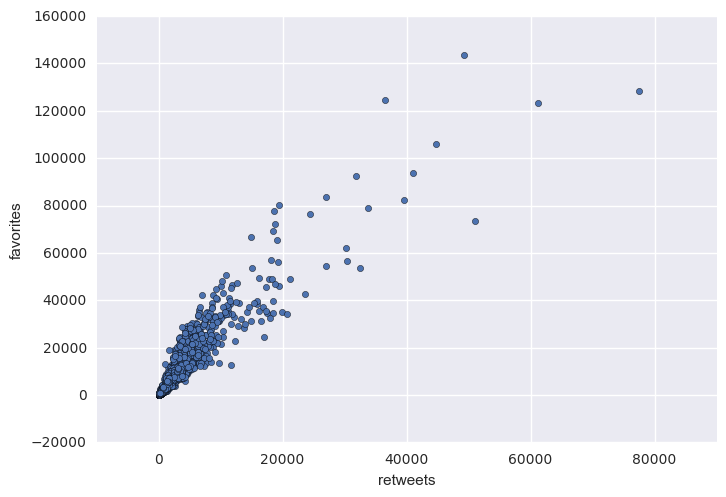

In [219]:
df_master.plot(x='retweets', y= 'favorites', kind = 'scatter' )
plt.show()

This scatterplot shows the distribution of retweets vs. favorites. We can see that a majority of observations are under 20,000 retweets and 80,000 favorites, but a handful of observations skew the data to the right. 

In [145]:
df_master.p1_dog.value_counts()

True     1477
False     517
Name: p1_dog, dtype: int64

In [222]:
df_master.p1_conf.describe()

count    1994.000000
mean        0.593941
std         0.271954
min         0.044333
25%         0.362857
50%         0.587635
75%         0.846285
max         1.000000
Name: p1_conf, dtype: float64

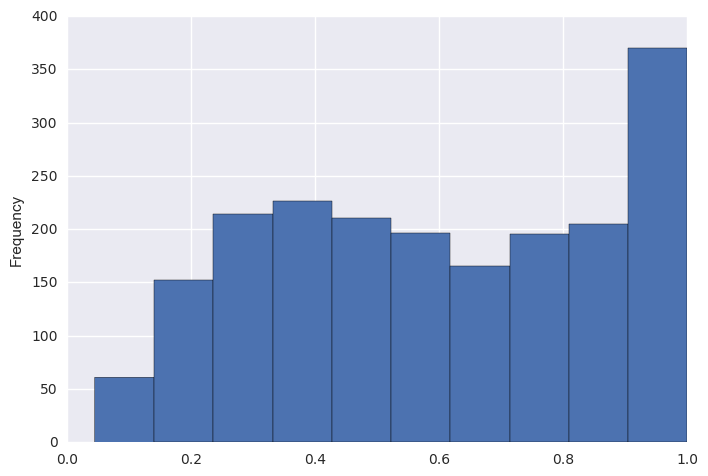

In [221]:
confidence = df_master.p1_conf
confidence.plot(kind = 'hist')
plt.show()

We can see that the image predictor's confidence levels are about 60% on average, with a large number of observations falling between 0.9 and 1.0. 

In [223]:
df_master.p1_dog.value_counts()

True     1477
False     517
Name: p1_dog, dtype: int64

In [149]:
df_master.p1.value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
Shih-Tzu                      17
beagle                        17
Cardigan                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
Lakeland_terrier              16
web_site                      15
          

Above we can see that 517 of the submitted dogs were not actually dogs, and the most frequently submitted dog is a golden retreiver. 

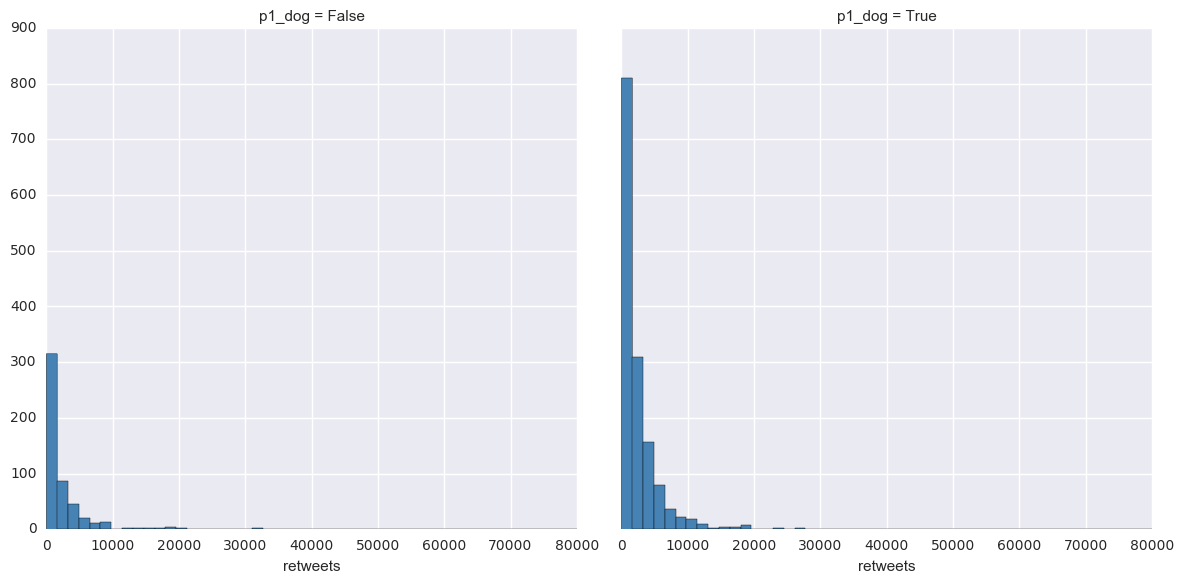

In [213]:
g = sns.FacetGrid(df_master, col="p1_dog", size= 6, margin_titles=True)
bins = np.linspace(0, 80000, 50)
g.map(plt.hist, "retweets", color="steelblue", bins= bins)
plt.show()

In these side-by-side histograms it shows people retweet much more often when the picture is of a dog; additionally we can see that a few non-dog posts had retweets of over 10,000. 